In [1]:
from guidance import models, gen, select, image, user, assistant, system, regex
from guidance._grammar import string
PHI_3_VISION_MODEL = "microsoft/Phi-3-vision-128k-instruct"

In [2]:

model_kwargs = {
    # "_attn_implementation": "eager", # Uncomment this line if flash attention is not working
    "trust_remote_code": True,
    "torch_dtype": "float16",
    "device_map": "auto",
}
phi3v = models.Transformers(
    model=PHI_3_VISION_MODEL, **model_kwargs
)

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

/home/nicholasking/code/guidance/env/lib/python3.10/site-packages/transformers/models/auto/image_processing_auto.py:517: FutureWarning: The image_processor_class argument is deprecated and will be removed in v4.42. Please use `slow_image_processor_class`, or `fast_image_processor_class` instead
  warnings.warn(


In [4]:
import requests
import torch
from PIL import Image
from transformers import MllamaForConditionalGeneration, AutoProcessor
import os
from huggingface_hub import login

# Retrieve token from environment variable
# login("")


LLAMA_VISION_ID = "meta-llama/Llama-3.2-11B-Vision"
model_kwargs = {
    "torch_dtype": "bfloat16",
    "device_map": "auto",
}
llamav = models.TransformersPhi3Vision(model=LLAMA_VISION_ID, **model_kwargs)

# model = MllamaForConditionalGeneration.from_pretrained(
#     model_id,
#     torch_dtype=torch.bfloat16,
#     device_map="auto",
# )
# processor = AutoProcessor.from_pretrained(model_id)

# url = "https://huggingface.co/datasets/huggingface/documentation-images/resolve/0052a70beed5bf71b92610a43a52df6d286cd5f3/diffusers/rabbit.jpg"
# image = Image.open(requests.get(url, stream=True).raw)

# prompt = "<|image|><|begin_of_text|>If I had to write a haiku for this one"
# inputs = processor(image, prompt, return_tensors="pt").to(model.device)

# output = model.generate(**inputs, max_new_tokens=30)
# print(processor.decode(output[0]))


Loading checkpoint shards:   0%|          | 0/5 [00:00<?, ?it/s]

In [3]:
lm = phi3v
# lm = llamav

with user():
    lm += "What is the capital of Hawaii?"

with assistant():
    lm += gen(stop="<|end|>")

with user():
    lm += "What is the population of Hawaii?"

with assistant():
    lm += gen(stop="<|end|>")

with user():
    lm += "What country is Hawaii in?"

with assistant():
    lm += gen(stop="<|end|>")


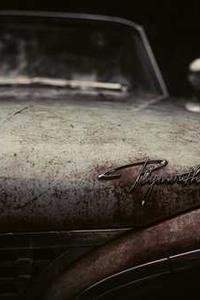

In [3]:
# No constraints test

lm = phi3v

with user():
    image_url = "https://picsum.photos/200/300"
    lm += "What do you see in this image?" + image(image_url)

with assistant():
    lm += gen(temperature=0.8)


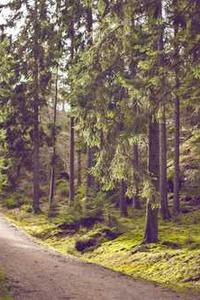

In [7]:
# With constraints test

lm = phi3v

with user():
    image_url = "https://picsum.photos/200/300"
    lm += "What do you see in this image?" + image(image_url)

with assistant():
    # lm += "The image portrays a " + select(["dog", "cat", "person", "thing", "place"])
    lm += f'The image portrays a ' 
    for i in range(10):
        lm += regex("[a-z]{1,16}") + gen(max_tokens=3) + ' '
    for i in range(15):
        lm += chr(ord('A') - 1 + i) + regex("[a-z]{1,16}") + ' '
    lm += f', but I lied, actually it shows '
    for i in range(10):
        lm += regex("[a-z]{1,16}") + gen(max_tokens=3) + ' '

In [6]:
print(lm)

<|user|>
What do you see in this image?<|_IMAGE:94898769574208|><|end|>
<|assistant|>
The image portrays a vintage car, ex machina, in a state of disrep air. The car is painted in a shade of black, with a white stri peeking out from the side. The h ighlight of the car @sits Autoworks Buick Century Deluxe Engines Fontana Greenwich Henry Indicator Joyce Kensington Labels Motorcycle News , but I lied, actually it shows the emblem of the Buick Century on the side of the car. The car is parked in a dimly lit garage, with a brick wall visible in the background and a white light <|end|>



In [8]:
print(lm)

<|user|>
What do you see in this image?<|_IMAGE:94898754310144|><|end|>
<|assistant|>
The image portrays a vintage car, ex machina, in a state of disrep air. The car is painted in a shade of black, with a white stri peeking out from the side. The h ighlight of the car @sits Autoworks Buick Century Deluxe Engines Fontana Greenwich Henry Indicator Joyce Kensington Labels Motorcycle News , but I lied, actually it shows the emblem of the Buick Century on the side of the car. The car is parked in a dimly lit garage, with a brick wall visible in the background and a white light <|end|>

